In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("twitter_training.csv")
val=pd.read_csv("twitter_validation.csv")

print("training dataset", train.head())
print("validation dataset", val.head())

training dataset    2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
validation dataset    3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thin

In [20]:
train.columns=['ID','Entity','Sentiments','tweet_content']
train.head()

,ID,Entity,Sentiments,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [21]:
val.columns=['ID','Entity','Sentiments','tweet_content']
val.head()

,ID,Entity,Sentiments,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [22]:
train.info()
val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             73995 non-null  int64 
 1   Entity         73995 non-null  object
 2   Sentiments     73995 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiments     999 non-null    object
 3   tweet_content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [23]:
print("Null values in training dataset")
display(train.isnull().sum())
print("Null values in validation dataset")
display(val.isnull().sum())

Null values in training dataset


ID               0
Entity           0
Sentiments       0
tweet_content    0
dtype: int64

Null values in validation dataset


ID               0
Entity           0
Sentiments       0
tweet_content    0
dtype: int64

In [24]:
train=train.dropna()

C:\Users\Prata\AppData\Local\Temp\ipykernel_6928\1980220176.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='Sentiments',palette='bright')


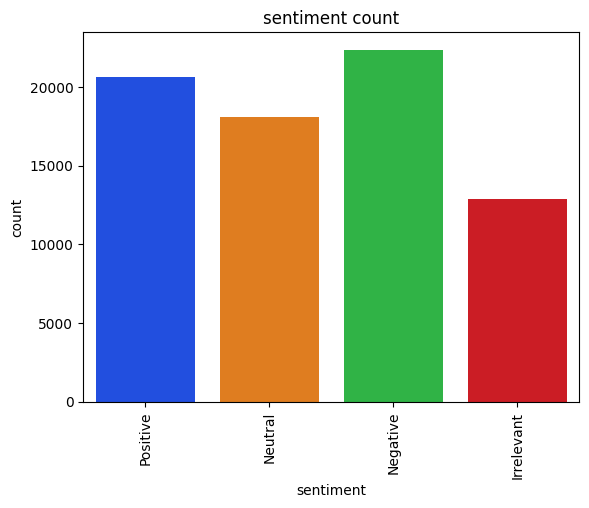

In [29]:
sns.countplot(data=train,x='Sentiments',palette='bright')
plt.title('sentiment count')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [30]:
train=train.drop(['ID'],axis=1)
val=val.drop(['ID'],axis=1)

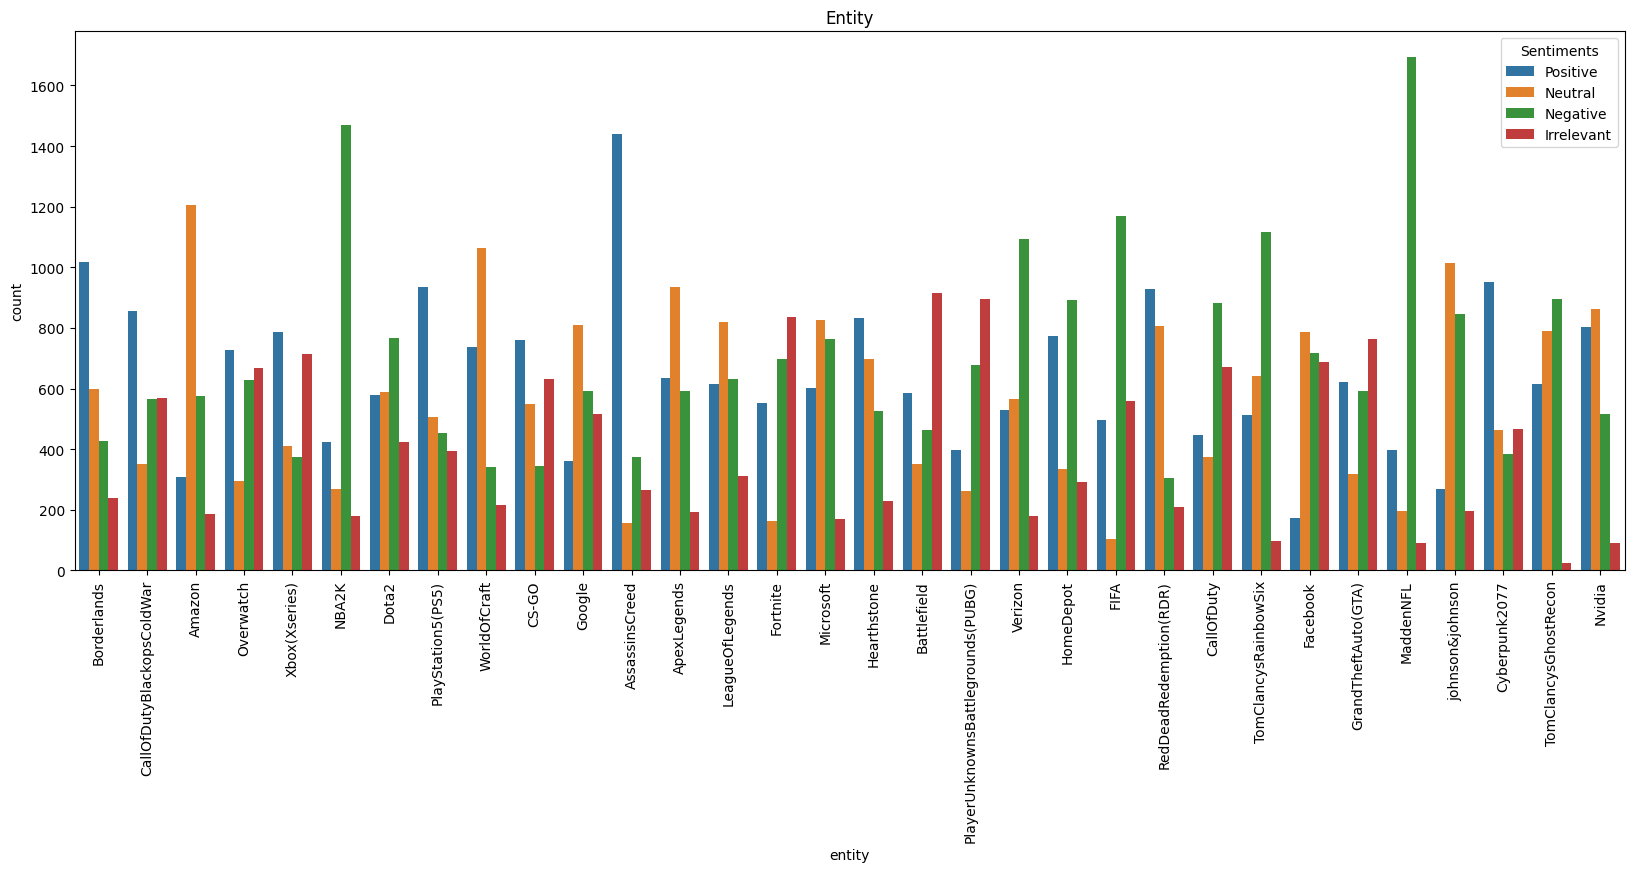

In [32]:
plt.figure(figsize=(20,7))
sns.countplot(data=train,x='Entity',hue='Sentiments')
plt.title('Entity')
plt.xlabel('entity')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [34]:
train=train.drop('Entity',axis=1)
val=val.drop('Entity',axis=1)

In [35]:
train.head(2)

,Sentiments,tweet_content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...


In [36]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prata\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Prata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
def clean_df(text):
    # Removes url
    text=re.sub(r'http\S+|www.\S+','',text)
    #Removes mentions and hashtag
    text=re.sub(r'@\w+|#\w+','',text)
    #Removes Special characters and numbers
    text=re.sub(r'^a-zA-Z\s','',text)
    #Converts to lower
    text=text.lower()
    #Removes extra white space
    text=re.sub(r'\s+',' ',text).strip()
    #return text
    words=word_tokenize(text)
    lemmatize=WordNetLemmatizer()
    words=[lemmatize.lemmatize(word) for word in words]
    stopword=set(stopwords.words('english'))
    words=[word for word in words if word not in stopword]
    words=[word for word in words if len(word)>4]
    indices=np.unique(words,return_index=True)[1]
    clean_text=np.array(words)[np.sort(indices)].tolist()
    return clean_text

In [38]:
train_data=list(train['tweet_content'])
test_data=list(val['tweet_content'])

In [39]:
train_clean=[clean_df(text) for text in train_data]
test_clean=[clean_df(text) for text in test_data]

In [40]:
X_train=train_clean
X_test=test_clean

In [42]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=lr.fit_transform(train['Sentiments'])
y_test=lr.transform(val['Sentiments'])

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx=tokenizer.word_index
sizevocab=len(word_idx)

In [45]:
sizevocab

31755

In [46]:
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)
X_train=pad_sequences(X_train,maxlen=150)
X_test=pad_sequences(X_test,maxlen=150)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)

In [51]:
cm=confusion_matrix(y_test,rf_predict)
cm
print(classification_report(y_test,rf_predict))

accuracy=accuracy_score(y_test,rf_predict)
print('Accuracy of Random Forest is:',accuracy)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       171
           1       0.86      0.89      0.87       266
           2       0.96      0.90      0.93       285
           3       0.85      0.92      0.88       277

    accuracy                           0.90       999
   macro avg       0.91      0.90      0.91       999
weighted avg       0.91      0.90      0.90       999

Accuracy of Random Forest is: 0.9029029029029029


In [53]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Input,Dense,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import Adam

max_len=150
input=Input(shape=(max_len,))
x=Embedding(sizevocab+1,100)(input)
x=Dropout(0.5)(x)
x=LSTM(150,return_sequences=True)(x)
x=Dropout(0.5)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(4,activation='softmax')(x)

model=Model(input,x)

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
import tensorflow as tf
num_classes=4
y_train_oh=tf.keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test_oh=tf.keras.utils.to_categorical(y_test,num_classes=num_classes)
y_test_oh

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [55]:
history=model.fit(X_train,y_train_oh,epochs=15,validation_data=(X_test,y_test_oh))

Epoch 1/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1103s 472ms/step - accuracy: 0.4394 - loss: 1.2094 - val_accuracy: 0.7868 - val_loss: 0.6640
Epoch 2/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1055s 451ms/step - accuracy: 0.7353 - loss: 0.6875 - val_accuracy: 0.8659 - val_loss: 0.4161
Epoch 3/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1663s 719ms/step - accuracy: 0.7997 - loss: 0.5171 - val_accuracy: 0.8709 - val_loss: 0.3324
Epoch 4/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1485s 642ms/step - accuracy: 0.8280 - loss: 0.4390 - val_accuracy: 0.8869 - val_loss: 0.3008
Epoch 5/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1191s 515ms/step - accuracy: 0.8425 - loss: 0.3996 - val_accuracy: 0.8949 - val_loss: 0.2925
Epoch 6/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 972s 420ms/step - accuracy: 0.8515 - loss: 0.3714 - val_accuracy: 0.8939 - val_loss: 0.2904
Epoch 7/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1199s 514ms/step - accuracy: 0.8582 - loss: 0.3525 - val_accuracy: 0.9009 - val_loss: 0.2713
Epoch 8/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 729s 315ms/ste

In [56]:
loss,accuracy=model.evaluate(X_test,y_test_oh)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9232 - loss: 0.2279


In [57]:
print('test loss:',loss)
print('test accuracy:',accuracy)

test loss: 0.2775006890296936
test accuracy: 0.9159159064292908
